<a href="https://colab.research.google.com/github/Alejandro-XIII/Proyecto-Final-SO/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Scheduling

##FCFS

In [2]:
def fcfs(processes):
    # Ordena los procesos por tiempo de llegada en orden ascendente
    processes_sorted = sorted(processes, key=lambda x: x['arrival_time'])

    # Inicializa la lista para almacenar el orden y tiempo de finalización de cada proceso
    scheduling = []

    # Inicializa el contador de tiempo actual
    time = 0

    # Itera a través de los procesos ordenados por tiempo de llegada
    for process in processes_sorted:
        # Incrementa el tiempo actual con el tiempo de ejecución del proceso
        time += process['run_time']

        # Agrega una tupla con el nombre del proceso y su tiempo de finalización
        scheduling.append((process['name'], time))

    # Devuelve la lista con el orden y tiempos de finalización de los procesos
    return scheduling


##SJF

In [3]:
def sjf(processes):
    # Crear una copia de los procesos para no modificar la entrada original
    processes_remaining = [{'name': p['name'], 'arrival_time': p['arrival_time'], 'run_time': p['run_time']} for p in processes]

    # Inicializa la lista para almacenar el orden y tiempo de finalización de cada proceso
    scheduling = []

    # Inicializa el contador de tiempo actual
    time = 0

    # Mientras haya procesos restantes por ejecutar
    while processes_remaining:
        # Filtra los procesos que ya han llegado (arrival_time <= time)
        available_processes = [p for p in processes_remaining if p['arrival_time'] <= time]

        # Encuentra el proceso con el menor tiempo de ejecución entre los disponibles
        shortest_process = min(available_processes, key=lambda x: x['run_time'])

        # Incrementa el tiempo actual con el tiempo de ejecución del proceso más corto
        time += shortest_process['run_time']

        # Remueve el proceso seleccionado de la lista de procesos restantes
        processes_remaining.remove(shortest_process)

        # Agrega una tupla con el nombre del proceso y su tiempo de finalización
        scheduling.append((shortest_process['name'], time))

    # Devuelve la lista con el orden y tiempos de finalización de los procesos
    return scheduling

##STCF

In [4]:
def stcf(processes):
    # Crear una copia de los procesos para no modificar la entrada original
    processes_remaining = [{'name': p['name'], 'arrival_time': p['arrival_time'], 'run_time': p['run_time']} for p in processes]

    # Obtener el arrival_time más alto para manejar el caso de procesos que llegan más tarde
    max_arrival_time = max(processes_remaining, key=lambda p: p['arrival_time'])['arrival_time']

    # Inicializa la lista para almacenar el orden y tiempo de finalización de cada proceso
    scheduling = []

    # Inicializa el contador de tiempo actual
    time = 0

    # Mientras haya procesos restantes por ejecutar
    while processes_remaining:
        if time < max_arrival_time:
            # Filtra los procesos que ya han llegado (arrival_time <= time)
            available_processes = [p for p in processes_remaining if p['arrival_time'] <= time]

            # Encuentra el proceso con el menor tiempo de ejecución entre los disponibles
            shortest_process = min(available_processes, key=lambda x: x['run_time'])

            # Encuentra el siguiente tiempo de llegada de procesos (si existe)
            next_arrival_time = min([p['arrival_time'] for p in processes_remaining if p['arrival_time'] > time])

            # Si el proceso más corto puede terminar antes del próximo arrival_time
            if shortest_process['run_time'] < (next_arrival_time - time):
                time += shortest_process['run_time']  # Incrementa el tiempo con el tiempo de ejecución del proceso
                processes_remaining.remove(shortest_process)  # Remueve el proceso completado
            else:
                # Reduce el tiempo restante del proceso más corto
                next(p for p in processes_remaining if p['name'] == shortest_process['name'])['run_time'] -= (next_arrival_time - time)
                time = next_arrival_time  # Avanza el tiempo al próximo arrival_time

            # Actualiza el scheduling según el último proceso ejecutado
            if scheduling and scheduling[-1][0] == shortest_process['name']:
                scheduling[-1] = (shortest_process['name'], time)  # Actualiza el tiempo del último proceso
            else:
                scheduling.append((shortest_process['name'], time))  # Agrega el proceso al scheduling
        else:
            # Si todos los procesos han llegado, ordenar por tiempo de ejecución
            processes_sorted = sorted(processes_remaining, key=lambda x: x['run_time'])

            # Ejecutar todos los procesos restantes en orden de tiempo de ejecución
            for process in processes_sorted:
                time += process['run_time']  # Incrementa el tiempo con el tiempo de ejecución del proceso
                if scheduling and scheduling[-1][0] == process['name']:
                    scheduling[-1] = (process['name'], time)  # Actualiza el tiempo del último proceso
                else:
                    scheduling.append((process['name'], time))  # Agrega el proceso al scheduling
                processes_remaining.remove(process)  # Remueve el proceso completado

    # Devuelve la lista con el orden y tiempos de finalización de los procesos
    return scheduling


##RR

In [5]:
def rr(processes, quantum):
    # Crear una copia de los procesos para no modificar la entrada original
    processes_remaining = [{'name': p['name'], 'arrival_time': p['arrival_time'], 'run_time': p['run_time']} for p in processes]

    # Lista para almacenar el orden y tiempo de finalización de cada proceso
    scheduling = []

    # Tiempo actual en el simulador
    time = 0

    # Cola de procesos listos para ejecutarse
    queue = []

    # Mientras haya procesos por llegar o procesos en la cola
    while processes_remaining or queue:
        # Agregar a la cola los procesos que hayan llegado (arrival_time <= tiempo actual)
        for process in processes_remaining:
            if process['arrival_time'] <= time and process not in queue:
                queue.insert(0, process)  # Insertar el proceso al principio de la cola

        # Sacar el primer proceso de la cola para ejecutarlo
        process = queue.pop(0)

        # Si el tiempo restante del proceso es mayor que el quantum
        if process['run_time'] > quantum:
            process['run_time'] -= quantum  # Reducir el tiempo restante del proceso
            time += quantum  # Avanzar el tiempo en el valor del quantum
            queue.append(process)  # Volver a poner el proceso al final de la cola
        else:
            # Ejecutar el proceso completamente si su tiempo restante es menor o igual al quantum
            time += process['run_time']  # Avanzar el tiempo en el tiempo restante del proceso
            process['run_time'] = 0  # Marcar el proceso como completado

        # Registrar el proceso ejecutado con su tiempo de finalización
        scheduling.append((process['name'], time))

        # Eliminar el proceso de la lista de procesos restantes si ya terminó
        processes_remaining = [p for p in processes_remaining if p['name'] != process['name']]

    # Retornar la lista con el orden y tiempos de finalización de los procesos
    return scheduling

##Imprimir scheduling

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define un diccionario de colores para cada proceso
process_colors = {
    'A': 'red',     # Color para el proceso A
    'B': 'blue',    # Color para el proceso B
    'C': 'green',   # Color para el proceso C
    # Agrega más procesos y colores según sea necesario
}

def plot_scheduling(scheduling, tt, tr):
    start_time = 0  # Tiempo inicial de la ejecución
    positions = []  # Lista para almacenar las posiciones y duraciones de los procesos
    for name, end_time in scheduling:
        positions.append((name, start_time, end_time - start_time))  # Calcula la duración del proceso y la guarda
        start_time = end_time  # Actualiza el tiempo inicial para el siguiente proceso

    fig, ax = plt.subplots(figsize=(10, 2))  # Crea la figura y el eje con un tamaño predefinido
    ax.set_xlim(0, scheduling[-1][1])  # Define los límites del eje x según el último tiempo de finalización
    ax.set_ylim(0, 1)  # Define los límites del eje y

    for name, start, duration in positions:
        color = process_colors.get(name, 'gray')  # Obtiene el color del proceso o gris por defecto
        rect = patches.Rectangle((start, 0.5), duration, 0.3, edgecolor='black', facecolor=color)  # Crea un rectángulo para representar el proceso
        ax.add_patch(rect)  # Añade el rectángulo al gráfico
        ax.text(start + duration / 2, 0.65, name, ha='center', va='center', color='white', fontsize=10)  # Añade el texto del nombre del proceso

    ax.get_yaxis().set_visible(False)  # Oculta el eje y
    ax.set_xlabel(f"TT: {tt}         TR: {tr}")  # Muestra el tiempo promedio de turnaround y respuesta como etiqueta del eje x

    plt.show()  # Muestra la gráfica

##Tturnaround

In [7]:
def t_turnaround(scheduling, processes):
    t_turnaround = 0  # Inicializa el tiempo total de turnaround en 0
    for process in processes:
        # Recorre la lista de scheduling en orden inverso para encontrar la última ocurrencia del proceso
        for name, t_completion in reversed(scheduling):
            if name == process['name']:  # Si el nombre coincide con el proceso actual
                # Calcula el tiempo de turnaround sumando el tiempo de finalización menos el tiempo de llegada
                t_turnaround += t_completion - process['arrival_time']
                break  # Rompe el bucle una vez encontrado el proceso
    # Retorna el tiempo promedio de turnaround dividiendo entre el número total de procesos
    return t_turnaround / len(processes)

##Tresponse

In [8]:
def t_response(scheduling, processes):
    t_response = 0  # Inicializa el tiempo total de respuesta en 0
    for process in processes:
        # Itera sobre la lista de scheduling para encontrar la primera ejecución del proceso
        for i in range(len(scheduling)):
            if scheduling[i][0] == process['name']:  # Si el nombre coincide con el proceso actual
                if i == 0:
                    t_firstrun = 0  # Si es el primer proceso en ejecutarse, su tiempo de inicio es 0
                else:
                    t_firstrun = scheduling[i-1][1]  # Obtiene el tiempo de finalización del proceso anterior
                # Calcula el tiempo de respuesta sumando el tiempo de inicio menos el tiempo de llegada
                t_response += t_firstrun - process['arrival_time']
                break  # Rompe el bucle una vez encontrado el proceso
    # Retorna el tiempo promedio de respuesta dividiendo entre el número total de procesos
    return t_response / len(processes)

#Modelo

##Dependencias

In [9]:
# Primero, reinstalar numpy y pandas en versiones estables en Colab.
!pip install numpy==1.23.5 pandas==2.2.2

# Instalar gymnasium y shimmy, que son más compatibles con versiones recientes de stable-baselines3
!pip install gymnasium==0.28.1 shimmy==0.2.1

# Instalar la versión más reciente de stable-baselines3
!pip install stable-baselines3

# Instalar PyTorch, ya que stable-baselines3 necesita esta dependencia
!pip install torch==2.5.0

  Using cached gymnasium-0.28.1-py3-none-any.whl.metadata (9.2 kB)
Using cached gymnasium-0.28.1-py3-none-any.whl (925 kB)
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 1.0.0
    Uninstalling gymnasium-1.0.0:
      Successfully uninstalled gymnasium-1.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 2.4.0 requires gymnasium<1.1.0,>=0.29.1, but you have gymnasium 0.28.1 which is incompatible.
  Using cached gymnasium-1.0.0-py3-none-any.whl.metadata (9.5 kB)
Using cached gymnasium-1.0.0-py3-none-any.whl (958 kB)
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 0.28.1
    Uninstalling gymnasium-0.28.1:
      Successfully uninstalled gymnasium-0.28.1


##Entorno de planificación de procesos

In [10]:
import gym
from gym import spaces
import numpy as np

class ProcessSchedulingEnv(gym.Env):
    def __init__(self, processes):
        super(ProcessSchedulingEnv, self).__init__()
        self.processes = processes  # Lista de procesos con tiempos de llegada y ejecución
        self.current_time = 0  # Tiempo actual del entorno
        self.execution_history = []  # Historial de todas las ejecuciones realizadas
        self.best_execution = []  # Historial de la mejor ejecución encontrada
        self.remaining_times = [p['run_time'] for p in processes]  # Lista de tiempos restantes para cada proceso
        self.last_process = None  # Nombre del último proceso ejecutado
        self.action_space = spaces.Discrete(len(processes))  # Espacio de acciones: índice de un proceso
        self.observation_space = spaces.Box(
            low=0, high=np.inf, shape=(len(processes),), dtype=np.float32
        )  # Espacio de observación: tiempos restantes para cada proceso

    def reset(self):  # Reiniciar el entorno
        self.current_time = 0  # Reinicia el tiempo actual
        self.execution_history = []  # Vacía el historial de ejecuciones
        self.remaining_times = [p['run_time'] for p in self.processes]  # Reinicia los tiempos restantes
        self.last_process = None  # Limpia el último proceso ejecutado
        return np.array(self.remaining_times, dtype=np.float32)  # Devuelve el estado inicial

    def step(self, action):  # Ejecutar una acción en el entorno
        valid_actions = [
            i for i, (rt, p) in enumerate(zip(self.remaining_times, self.processes))
            if rt > 0 and self.current_time >= p['arrival_time']
        ]  # Identifica acciones válidas según tiempos restantes y de llegada
        if valid_actions and action not in valid_actions:
            return np.array(self.remaining_times), -100, False, {}  # Penalización por acción inválida

        self.remaining_times[action] -= 1  # Disminuye el tiempo restante del proceso seleccionado
        self.current_time += 1  # Incrementa el tiempo actual
        if self.last_process != self.processes[action]['name']:  # Si se cambia de proceso
            self.execution_history.append((self.processes[action]['name'], self.current_time))  # Registra el cambio
            self.last_process = self.processes[action]['name']  # Actualiza el último proceso ejecutado
        else:
            self.execution_history[-1] = (self.execution_history[-1][0], self.current_time)  # Actualiza el último tiempo

        done = all(rt <= 0 for rt in self.remaining_times)  # Comprueba si todos los procesos han finalizado
        tt = t_turnaround(self.execution_history, self.processes)  # Calcula el Turnaround Time promedio
        tr = t_response(self.execution_history, self.processes)  # Calcula el Response Time promedio

        if done:  # Si todos los procesos han terminado
            if not self.best_execution:  # Si no hay una mejor ejecución registrada
                self.best_execution = self.execution_history.copy()  # Guarda el historial actual como mejor ejecución
            else:  # Si ya hay una mejor ejecución, la compara
                tt_b = t_turnaround(self.best_execution, self.processes)  # TT de la mejor ejecución
                tr_b = t_response(self.best_execution, self.processes)  # TR de la mejor ejecución
                if (tt + tr) < (tt_b + tr_b):  # Si la ejecución actual es mejor, la reemplaza
                    self.best_execution = self.execution_history.copy()

        reward = 100 - (tr + tt)  # Calcula la recompensa basada en TT y TR
        return np.array(self.remaining_times, dtype=np.float32), reward, done, {}  # Retorna el estado, recompensa y estado final

##Entrenamiento de modelo PPO

In [11]:
from stable_baselines3 import PPO

def modelo(processes):
    # Instanciar el entorno y el modelo PPO
    env = ProcessSchedulingEnv(processes)  # Crea el entorno de programación de procesos
    model = PPO("MlpPolicy", env, verbose=0)  # Crea el modelo PPO con una política MLP

    # Entrenamiento del modelo con un número determinado de pasos
    model.learn(total_timesteps=100)  # Aquí defines el número de timesteps para el entrenamiento

    # Inicializa el entorno para evaluación
    obs = env.reset()  # Resetea el entorno y obtiene la primera observación
    done = False
    while not done:
        # Predicción de la acción a tomar con el modelo entrenado
        action, _states = model.predict(obs, deterministic=False)  # predice la siguiente acción

        # El modelo ejecuta la acción en el entorno
        obs, reward, done, info = env.step(action)  # El entorno avanza un paso con la acción tomada

    # Retorna la mejor ejecución registrada después de completar el proceso
    return env.best_execution  # Devuelve la mejor ejecución encontrada durante el entrenamiento


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation


# Pruebas

##Definir procesos

In [13]:
# Definimos una lista de procesos con nombre, tiempo de llegada y tiempo de ejecución
processes = [
    {'name': 'A', 'arrival_time': 0, 'run_time': 5},
    {'name': 'B', 'arrival_time': 0, 'run_time': 4},
    {'name': 'C', 'arrival_time': 5, 'run_time': 3},
]

##FCFS

[('A', 5), ('B', 9), ('C', 12)]


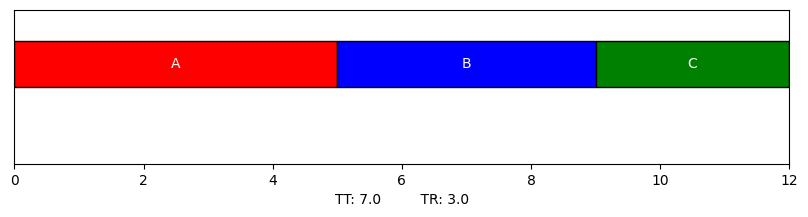

In [14]:
# Ejecutar el algoritmo FCFS (First-Come, First-Served) sobre los procesos
scheduling = fcfs(processes)
print(scheduling)  # Imprimir el resultado del algoritmo FCFS, que es el orden en que se ejecutan los procesos

# Calcular el tiempo de turnaround (TT) usando el resultado del scheduling
tt = t_turnaround(scheduling, processes)
# Calcular el tiempo de respuesta (TR) usando el resultado del scheduling
tr = t_response(scheduling, processes)

# Graficar el plan de ejecución de los procesos, mostrando los tiempos de turnaround y respuesta en el eje x
plot_scheduling(scheduling, tt, tr)

##SJF

[('B', 4), ('A', 9), ('C', 12)]


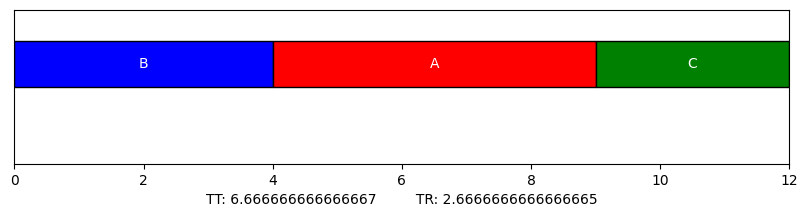

In [15]:
# Ejecutar el algoritmo SJF (Shortest Job First) sobre los procesos
scheduling = sjf(processes)
print(scheduling)  # Imprimir el resultado del algoritmo SJF, que es el orden en que se ejecutan los procesos

# Calcular el tiempo de turnaround (TT) usando el resultado del scheduling
tt = t_turnaround(scheduling, processes)
# Calcular el tiempo de respuesta (TR) usando el resultado del scheduling
tr = t_response(scheduling, processes)

# Graficar el plan de ejecución de los procesos, mostrando los tiempos de turnaround y respuesta en el eje x
plot_scheduling(scheduling, tt, tr)

##STCF

[('B', 4), ('A', 5), ('C', 8), ('A', 12)]


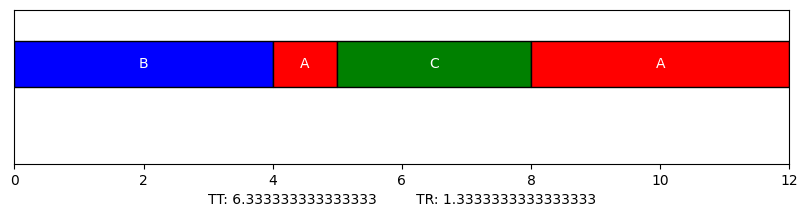

In [16]:
# Ejecutar el algoritmo STCF (Shortest Time to Completion First) sobre los procesos
scheduling = stcf(processes)
print(scheduling)  # Imprimir el resultado del algoritmo STCF, que es el orden en que se ejecutan los procesos

# Calcular el tiempo de turnaround (TT) usando el resultado del scheduling
tt = t_turnaround(scheduling, processes)
# Calcular el tiempo de respuesta (TR) usando el resultado del scheduling
tr = t_response(scheduling, processes)

# Graficar el plan de ejecución de los procesos, mostrando los tiempos de turnaround y respuesta en el eje x
plot_scheduling(scheduling, tt, tr)

##RR

[('B', 1), ('A', 2), ('B', 3), ('A', 4), ('B', 5), ('C', 6), ('A', 7), ('B', 8), ('C', 9), ('A', 10), ('C', 11), ('A', 12)]


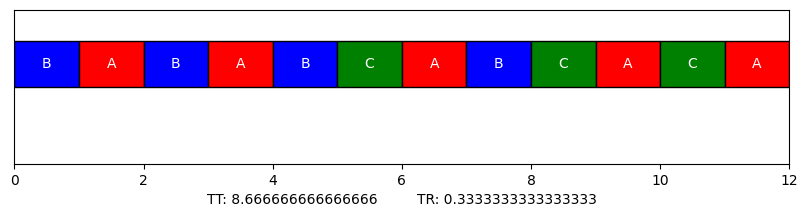

In [17]:
# Ejecutar el algoritmo Round Robin (RR) con un quantum sobre los procesos
scheduling = rr(processes, 1)
print(scheduling)  # Imprimir el resultado del algoritmo RR, que es el orden en que se ejecutan los procesos

# Calcular el tiempo de turnaround (TT) usando el resultado del scheduling
tt = t_turnaround(scheduling, processes)
# Calcular el tiempo de respuesta (TR) usando el resultado del scheduling
tr = t_response(scheduling, processes)

# Graficar el plan de ejecución de los procesos, mostrando los tiempos de turnaround y respuesta en el eje x
plot_scheduling(scheduling, tt, tr)


##Modelo

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


[('B', 1), ('A', 2), ('B', 5), ('C', 8), ('A', 12)]


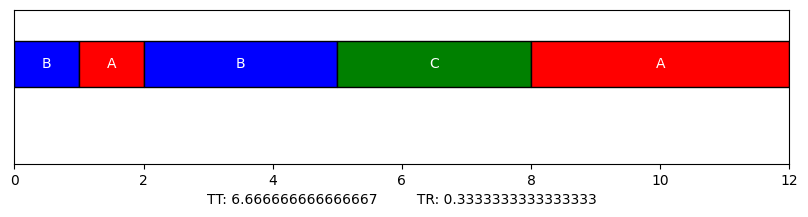

In [18]:
# Ejecutar el modelo de aprendizaje automático con los procesos proporcionados
scheduling = modelo(processes)
print(scheduling)  # Imprimir el resultado de la ejecución del modelo, que es el orden de los procesos y sus tiempos de finalización

# Calcular el tiempo de turnaround (TT) usando el resultado del scheduling del modelo
tt = t_turnaround(scheduling, processes)
# Calcular el tiempo de respuesta (TR) usando el resultado del scheduling del modelo
tr = t_response(scheduling, processes)

# Graficar el plan de ejecución de los procesos, mostrando los tiempos de turnaround y respuesta en el eje x
plot_scheduling(scheduling, tt, tr)